# Pair Programming Visualización I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con los csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.  

Hoy realizaremos una serie de gráficas usando la librería de `matplotlib` para familiarizarnos un poco con los datos.  

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo `value_counts()`, `isnull`, `describe`, etc.   

Tendréis que realizar gráficas para contestar a las siguientes preguntas:  

1. ¿Cuántos tickets tenemos de cada tipo?  

In [7]:
df_empleados = pd.read_csv('../pandas/datos/Empleados2.csv', index_col=0)
df_empleados.head(2)

,turno,id_empleado,apellido,nombre,id_puesto,email
0,A,6,VILLA,JESUS,50-32200,jesus.villa@tractchun.com
1,NaN,10,MENDEZ,RICARDO,15-24100,ricardo.mendez@tractchun.com


In [6]:
df_agentes = pd.read_csv('../pandas/datos/Agentes2.csv', index_col=0)
df_agentes.head(2)

,id_agente,nombre,email,fecha_de_nacimiento
0,1,Mata Lucero,lucero.mata@tractchun.com,1989/4/28
1,2,JesusGrajeda,jesus.grajeda@tractchun.com,1979/1/1


In [5]:
df_2016 = pd.read_excel('../pandas/datos/2016_2.xlsx')
df_2016.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0


In [35]:
df_valores = df_2016['tipo'].value_counts().reset_index()
df_valores

,index,tipo
0,Solicitud,9756
1,Problema,3294


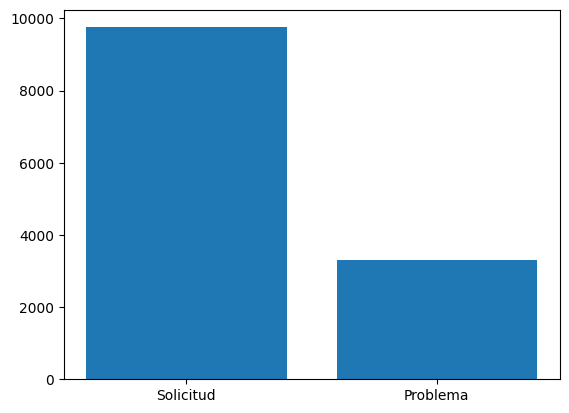

In [36]:
plt.figure()
plt.bar(df_valores['index'], df_valores['tipo'])
plt.show() 

2. Filtrad los datos para quedarnos solo con los datos de la categoría "Software".  
    - Dentro del conjunto de datos filtrado que acabamos de generar, realiza la mejor visualización para mostrar cuantos tickets tenemos de cada tipo que tenemos (Problema o Solicitud).
    - Usando el mismo conjunto de datos filtrado, ¿existe alguna relación entre la satisfacción y los días de resolución?. Poned los nombres de los ejes, siendo el eje x los "días de resolución" y el eje y la "satisfacción".
    - Usando el mismo conjunto de datos filtrado, ¿cuál es la frecuencia de cada una de las satisfacciones que tenemos en el conjunto de datos?   

In [38]:
df_sw = df_2016[df_2016['categoría'] == 'Software']
df_sw.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0


In [39]:
df_valores_sw = df_sw['tipo'].value_counts().reset_index()
df_valores_sw

,index,tipo
0,Solicitud,1948
1,Problema,664


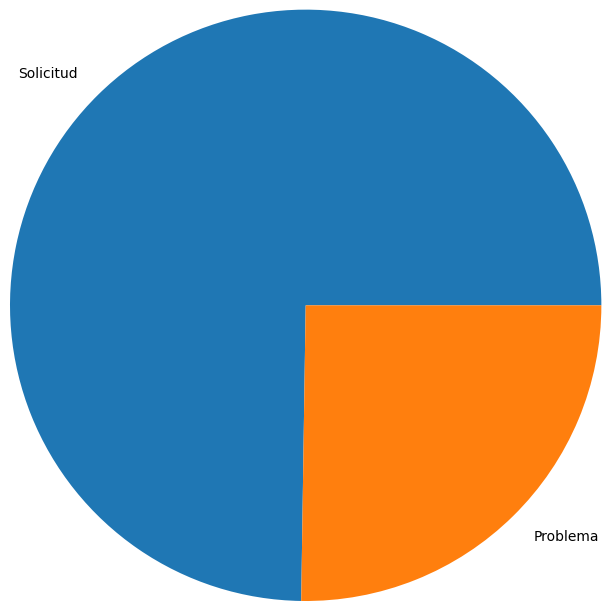

In [41]:
plt.figure()
plt.pie(df_valores['tipo'], labels=df_valores['index'], radius=2)
plt.show() 

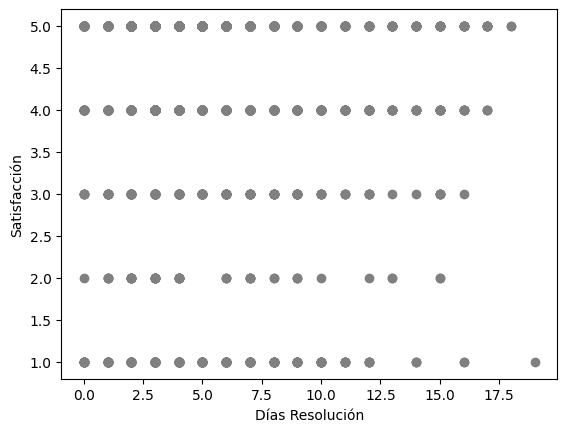

In [44]:
plt.figure()
plt.scatter(df_sw['días_resolución'],df_sw['satisfacción'], color='grey') 
plt.xlabel('Días Resolución')
plt.ylabel('Satisfacción') 
plt.show()

No parece haber ninguna relación entre la satisfacción y los días requeridos para solucionar el ticket.

In [ ]:
df_valores_sat = df_sw['tipo'].value_counts().reset_index()
df_valores_sat

3. En el ejercicio anterior hemos filtrado por "Software", realizar los mismos ejercicios que en el ejercicio 2, solo que en este caso filtrar por "Hardware"  

Como ya hemos dicho en algunas ocasiones, somo analistas de datos y no debemos conformarnos solo con escribir el código y que nos devuelva una gráfica. Una vez que hayáis terminado de hacer las gráficas, interpretad los resultados obtenidos de las gráficas creadas en el ejercicio 3 y 4. El objetivo, hacer una comparación entre la categoría "Software" y "Hardware", por ejemplo, ¿están los clientes que tienen problemas de la categoría "Software" más satisfechos que los clientes de la categoría "Hardware".